# Perceptrón Simple
**Objetivo general:** Entender el uso de un algoritmo de clasificación sencillo como el Perceptrón.
 

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import mlutils
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# sklearn


Generamos datos para jugar un poco y entender...

### `load_dataset_up_down`
Definimos la funcion y luego la aplicamos.

In [32]:
def load_dataset_up_down(size, seed=39):
    np.random.seed(seed)
    x = np.random.poisson(5, size) * (np.random.randint(0,2, size) * 2 - 1)
    y = (np.random.poisson(5, size) + 1) * (np.random.randint(0,2, size) * 2 - 1)
    X = np.array(list(zip(x,y)))
    Y = (X[:,1] > 0).astype(np.int8)
    return X, Y

## Entrenamiento con 100 puntos

Veamos los datos

In [33]:
X, Y = load_dataset_up_down(1000, seed = 39)
print(' Datos '. center(100, '='))
display(X[:5])
print(' Etiquetas '.center(100,'='))
display(Y[:50])

============================================== Datos ===============================================


array([[-6,  2],
       [11, -4],
       [-5,  6],
       [-5, -7],
       [-7, -6]])

============================================ Etiquetas =============================================


array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0], dtype=int8)

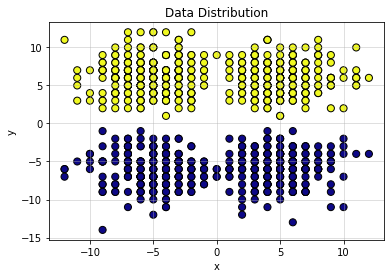

In [34]:
indices = np.argsort(Y)
X = X[indices]
Y = Y[indices]

plt.scatter(x = X[:, 0], 
            y = X[:, 1],
            c=Y,
            s=50,
            edgecolors = 'k',
            cmap=plt.cm.plasma)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Distribution')

plt.grid(alpha = 0.50)

plt.show()

### `Perceptron`
**Objetivo:** Utilizar el algoritmo del Perceptrón para clasificar observaciones de las que contamos con datos de una variable ficticia x y una variable ficticia y. Sabemos *a priori* que los datos son linealmente separables (esto es algo de los que no siempre vamos a estar seguros, sobre todo cuando tenemos más de 3 variables y no es posible graficar los datos).

In [35]:
from sklearn.linear_model import Perceptron

# 1. Instanciamos la clase Perceptron, es decir, definimos el modelo que queremos utilizar
clf_1 = Perceptron(max_iter=5, shuffle = True, random_state=1)

# 2. Entrenamos el modelo. En este caso vamos a usar TODOS los datos que tenemos
clf_1.fit(X, Y)

Perceptron(max_iter=5, random_state=1)

Graficamos utilizando la función que escribimos en el módulo mlutils:

In [36]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean)#OrRd_r)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Greys)

Accuracy: 100 


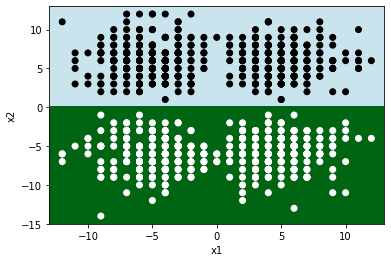

In [37]:
plot_decision_boundary(lambda x: clf_1.predict(x), X.T, Y.T)
predictions = clf_1.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

In [9]:
print(' RESUMEN DE RESULTADOS '.center(100, '='))
print(f'Clases: {clf_1.classes_}')
print(f'Coeficiente (pendiente): {clf_1.coef_}' ) # Weights assigned to the features
print(f'Ordenada al origen: {clf_1.intercept_}') # Constants in decision function.
print(f'Hiperparámetros:\n {clf_1.get_params()}') # Get parameters for this estimator.
print(' XX '.center(100, '=')) 

====================================== RESUMEN DE RESULTADOS =======================================
Clases: [0 1]
Coeficiente (pendiente): [[ 0. 17.]]
Ordenada al origen: [-4.]
Hiperparámetros:
 {'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 1.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 5, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 1, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
================================================ XX ================================================


## Qué sucede si entrenamos varias veces con distintas semillas? 

In [10]:
np.random.randint(0,100)

41

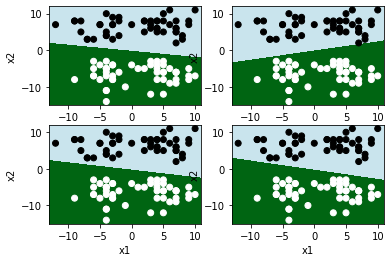

In [11]:
X, Y = load_dataset_up_down(100,seed=3)
for i in range(1,5): 
    plt.subplot(2,2,i)
    clf_2 = Perceptron(max_iter=5, random_state=np.random.randint(0,100))
    clf_2.fit(X, Y)
    plot_decision_boundary(lambda x: clf_2.predict(x), X.T, Y.T)
plt.show()

Vemos que utilizando diferentes semillas siempre llega a una solución (porque el problema de clasificación es linelmente separable), pero no siempre es la misma solución.

## Y si los datos no son linealmente separables?

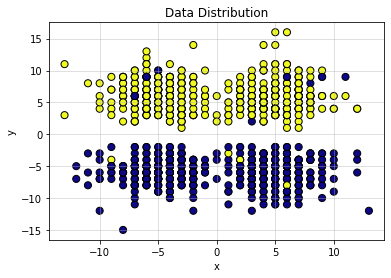

In [12]:
# con este bloque lo que vamos a hacer es cambiar la clasificaciónd e algunos puntos, de manera tal que dentro del
# espacio donde antes eran todos amarillos aparezcan algunos azules y viceversa
# En este caso el problea de calsificación se transforma en un problema que NO ES LINEALMENTE SEPARABLE
X, Y = load_dataset_up_down(1000,seed=3)
some_noise = np.random.binomial(n = 1, p = .03, size = Y.shape[0])
Y = np.logical_xor(Y, some_noise).astype(np.int8)

plt.scatter(x = X[:, 0], 
            y = X[:, 1],
            c=Y,
            s=50,
            edgecolors = 'k',
            cmap=plt.cm.plasma)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Distribution')

plt.grid(alpha = 0.50)

plt.show()

Documentación [Perceptrón](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [13]:
# Instanciamos la clase Perceptron y definimos algunos hiperparámetros
clf_3 = Perceptron(shuffle=False, max_iter=5, random_state=1)

# Entrenamos el modelo
clf_3.fit(X, Y)

Perceptron(max_iter=5, random_state=1, shuffle=False)

Accuracy: 86 


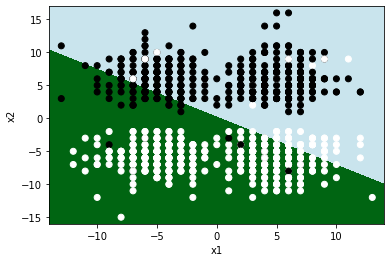

In [14]:
plot_decision_boundary(lambda x: clf_3.predict(x), X.T, Y.T)
predictions = clf_3.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

Vemos que ahora el algoritmo converge en una solución que no parece ser la más óptima. La frontera de decisión que se obtiene corriendo el algoritmo con los hiperparámetros definidos antes se ve que puede ser mejorada 

In [15]:
clf_4 = Perceptron(shuffle = True, max_iter = 100, random_state = 10)
clf_4.fit(X, Y)

Perceptron(max_iter=100, random_state=10)

Accuracy: 94 


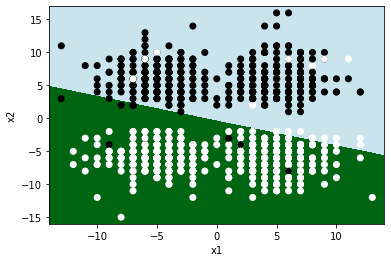

In [16]:
plot_decision_boundary(lambda x: clf_4.predict(x), X.T, Y.T)
predictions = clf_4.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

### `verbose = True`
Esta configuración nos permite ir viendo paso a paso qué está haciendo el aloritmo.

-- Epoch 1
Norm: 6.32, NNZs: 2, Bias: 3.000000, T: 1000, Avg. loss: 2.993000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 12.17, NNZs: 2, Bias: 1.000000, T: 2000, Avg. loss: 2.750000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 6.08, NNZs: 2, Bias: -3.000000, T: 3000, Avg. loss: 2.916000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 15.23, NNZs: 2, Bias: 3.000000, T: 4000, Avg. loss: 3.117000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 11.40, NNZs: 2, Bias: -7.000000, T: 5000, Avg. loss: 3.147000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 10.05, NNZs: 2, Bias: 6.000000, T: 6000, Avg. loss: 3.043000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 5.83, NNZs: 2, Bias: -5.000000, T: 7000, Avg. loss: 2.761000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds
Accuracy: 89 


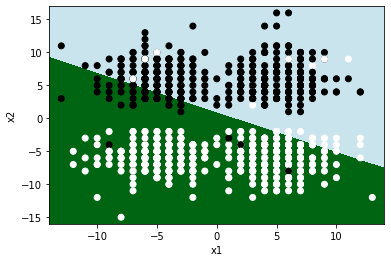

In [19]:
clf_5 = Perceptron(verbose=1)
clf_5.fit(X, Y)
plot_decision_boundary(lambda x: clf_5.predict(x), X.T, Y.T)
predictions = clf_5.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

Lo que es importante analizar del bloque anterior es el **Avg. loss**.

Uno siempre quiere que ese valor vaya dismunuyendo a medida que avanzan las épocas. Porque uno quiere encontrar el mínimo de esa funcion.

En este caso en particular vemos que la función de costo promedio oscila alrededor de una valor. No está evolucionando hacia un minimo. Esto sugiere que el algoritmo está estancado en un minimo local del cual no está pudiendo salir.

Hay muchas explicaciones a por qué podría estar sucediendo esto. Podría ser que los pasos sean muy grandes, o muy chicos.

Para el próximo entrenamiento lo que vamos a hacer es cambiar algunos hiperparámetros para tratar de lograr que el la funcion de costo promedio vaya disminuyendo época a época.

-- Epoch 1
Norm: 0.02, NNZs: 2, Bias: -0.002000, T: 1000, Avg. loss: 0.002805
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 2, Bias: 0.004000, T: 2000, Avg. loss: 0.002421
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 2, Bias: 0.003000, T: 3000, Avg. loss: 0.002141
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 2, Bias: 0.002000, T: 4000, Avg. loss: 0.001740
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.09, NNZs: 1, Bias: 0.002000, T: 5000, Avg. loss: 0.001539
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.10, NNZs: 1, Bias: 0.001000, T: 6000, Avg. loss: 0.001683
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds
Accuracy: 96 


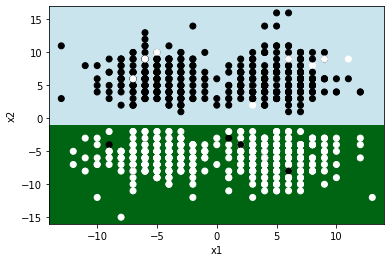

In [22]:
clf_6 = Perceptron(penalty="l1",alpha=1e-3,eta0=0.001,random_state=1, verbose=1)
clf_6.fit(X, Y)
plot_decision_boundary(lambda x: clf_6.predict(x), X.T, Y.T)
predictions = clf_6.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

Notar que con el cambio de hiperparámetros conseguimos que la función de costo promedio disminuya época a época y así llegar a una solución, que si bien no es perfecta (ya sabíamos que no era posible llegar a una accuracy del 100% porque este caso no era linealmente separable) es lo mejor que podemos conseguir.